In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.2
numpy version: 1.24.1
seaborn version: 0.12.2


### Utility functions

In [4]:
def df_unique_value(df):

    for c in df.columns:
        col_type = df[c].type

        if col_type == 'object' or col_type.name == 'category':
            print(f'{c:10}\n{df[c].unique()}')
            print('-' * 65)

def convert_col_to_category(df, cols:list):
    """ 
    convert 'cols' to 'category
    """

    for c in df[cols]:
        
        df[c] = df[c].astype('category')
    return df
    
def convert_obj_columns_tocategory(df):

    for c in df.columns:
        col_type = df[c].dtype

        if col_type == 'object' or col_type.name == 'category':
            df[c] = df[c].astype('category')
    return df

def print_category_columns(df):

    for c in df.columns:
        col_type = df[c].dtype

        if col_type.name == 'category':
            print(f'{c}: {df[c].cat.categories}')
            print(pd.Series(df[c].cat.categories))
            print(f'{c:15}: {list(enumerate(df[c].cat.categories))}')
            print('-' * 60)

def plot_mn(df, cols, n_rows:int = 1, kind:str = 'boxplot', color = 'salmon'):

    """ 
    plot boxplot, violin, hist in m (rows) by n (columns)
    >>> plot_mn(df, ['Calories', 'Fat'], 2, 'hist')
    """

    n = len(cols)
    n_cols = math.ceil(n / n_rows)
    fig, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3, n_rows * 3))
    ax = ax.ravel()

    fig.tight_layout()

    for i, c in enumerate(cols):

        col_type = df[c].dtype

        if col_type.name == 'category':
            sns.countplot(data = df, x = c, ax = ax[i])
        else:
            if kind.lower() == 'boxplot':
                sns.boxplot(data = df[[c]], ax = ax[i], color = color)
            elif kind.lower() == 'violin':
                sns.violinplot(data = df[[c]], ax = ax[i], color = color)
            elif kind.lower() == 'hist':
                sns.histplot(data = df[c], kde = False, ax = ax[i], color = color)

In [5]:
# load data to dataframe from AJ. Prasert's Github

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/titanic_train.csv'
df = pd.read_csv(url)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Convert object/string columns to category data type for lightGBM

In [8]:
df.columns # get column names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
cols_to_cat = ['Pclass', 'Sex', 'Embarked']

convert_col_to_category(df, cols_to_cat)
print_category_columns(df)

Pclass: Int64Index([1, 2, 3], dtype='int64')
0    1
1    2
2    3
dtype: int64
Pclass         : [(0, 1), (1, 2), (2, 3)]
------------------------------------------------------------
Sex: Index(['female', 'male'], dtype='object')
0    female
1      male
dtype: object
Sex            : [(0, 'female'), (1, 'male')]
------------------------------------------------------------
Embarked: Index(['C', 'Q', 'S'], dtype='object')
0    C
1    Q
2    S
dtype: object
Embarked       : [(0, 'C'), (1, 'Q'), (2, 'S')]
------------------------------------------------------------


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 65.8+ KB


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] # list of required columns
cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

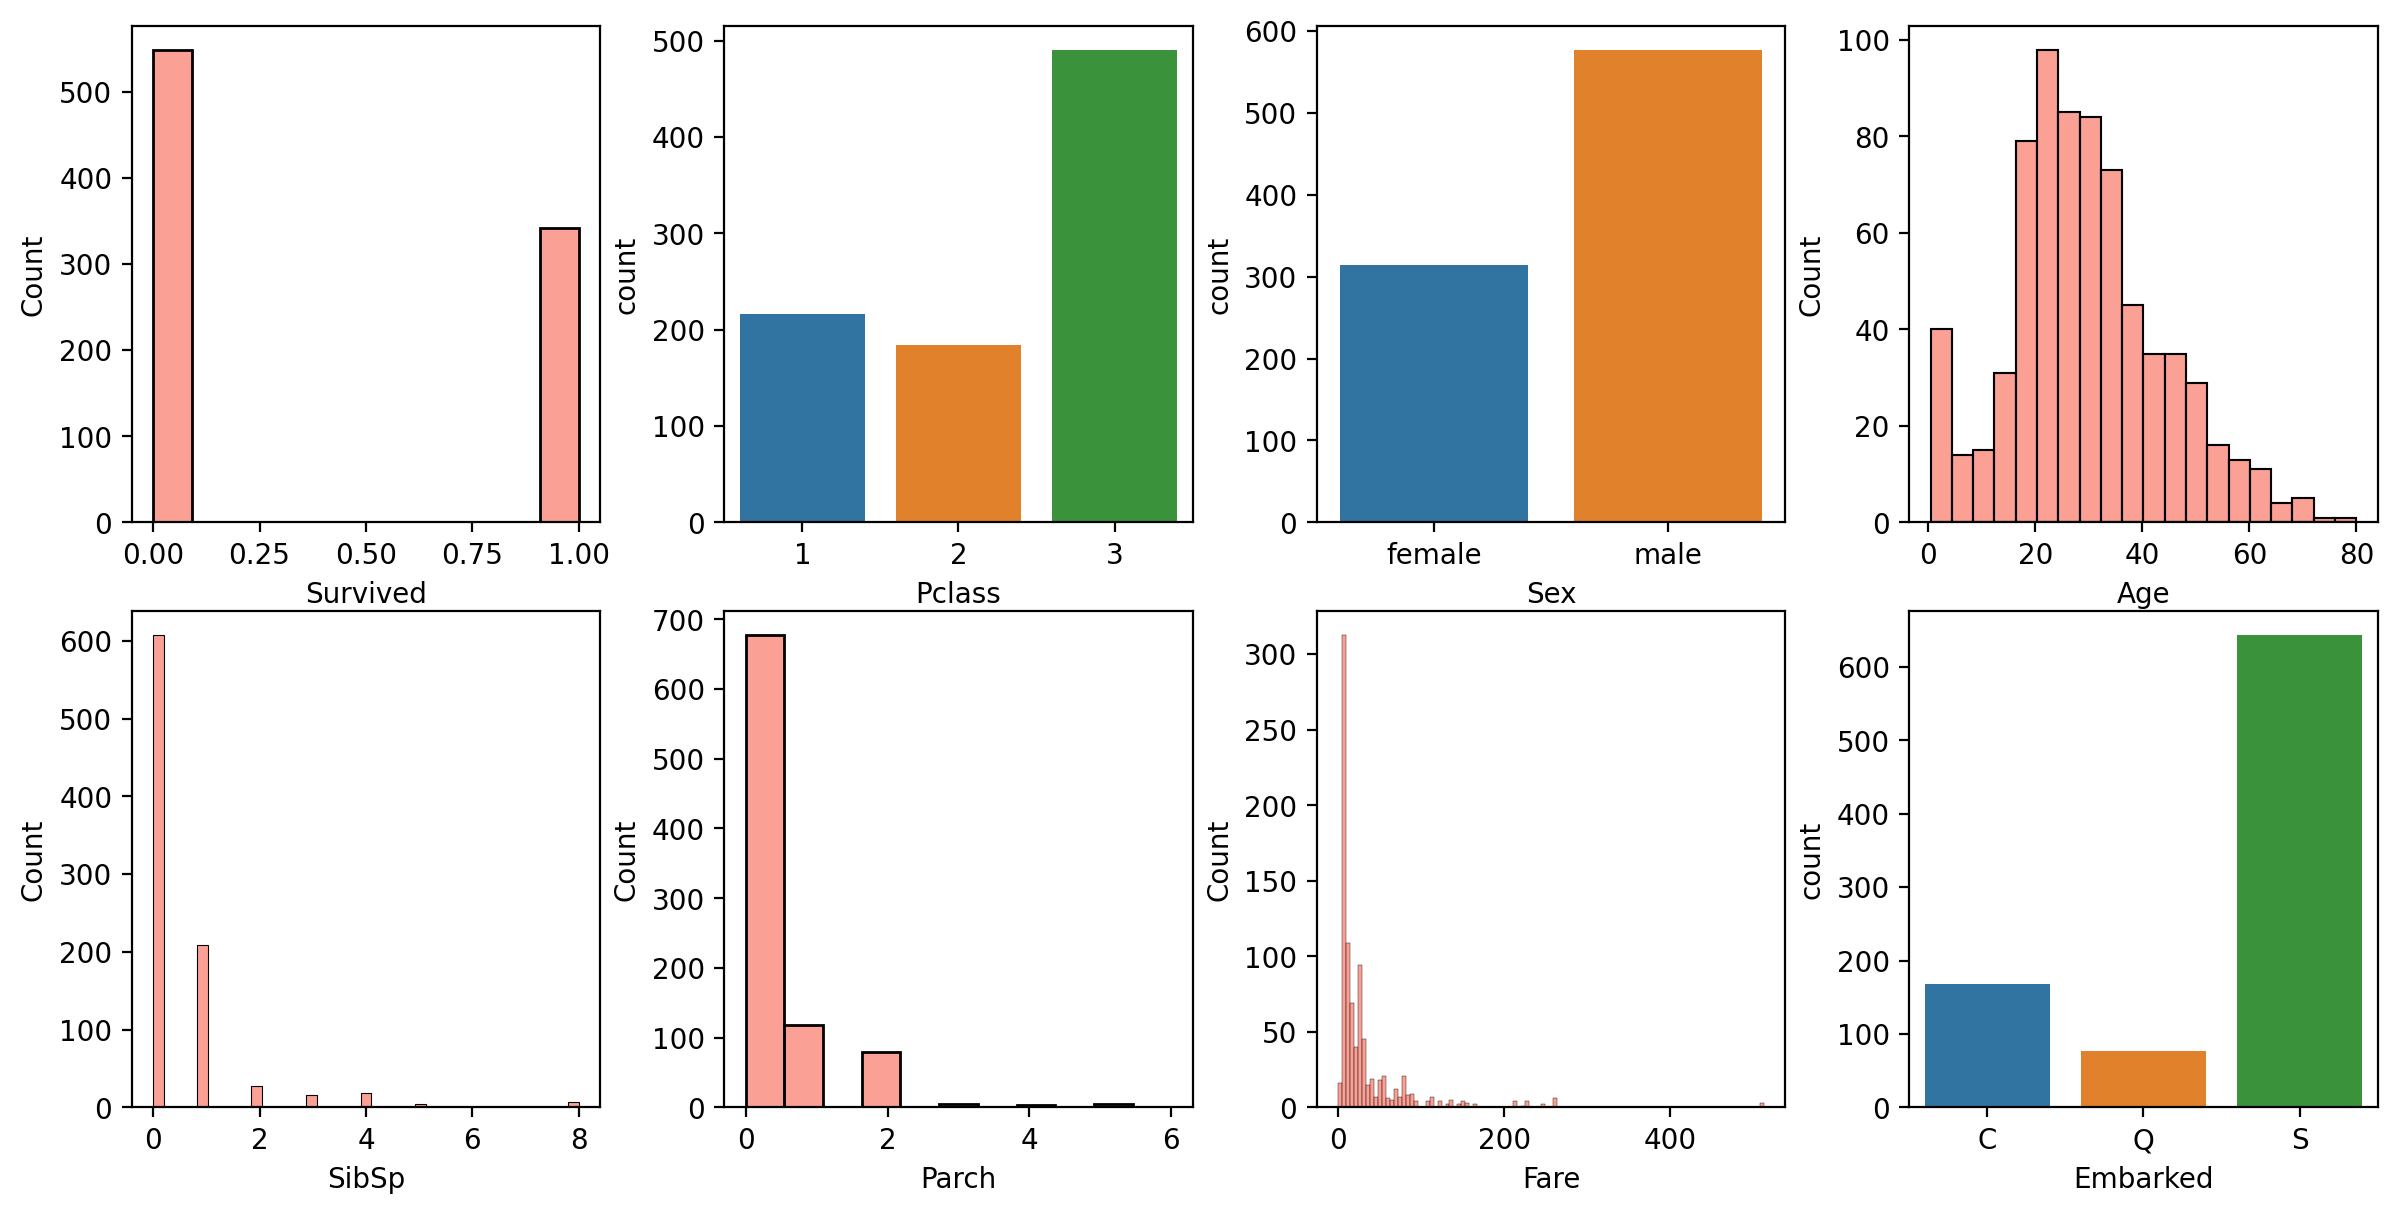

In [13]:
plot_mn(df, cols, 2, 'hist')

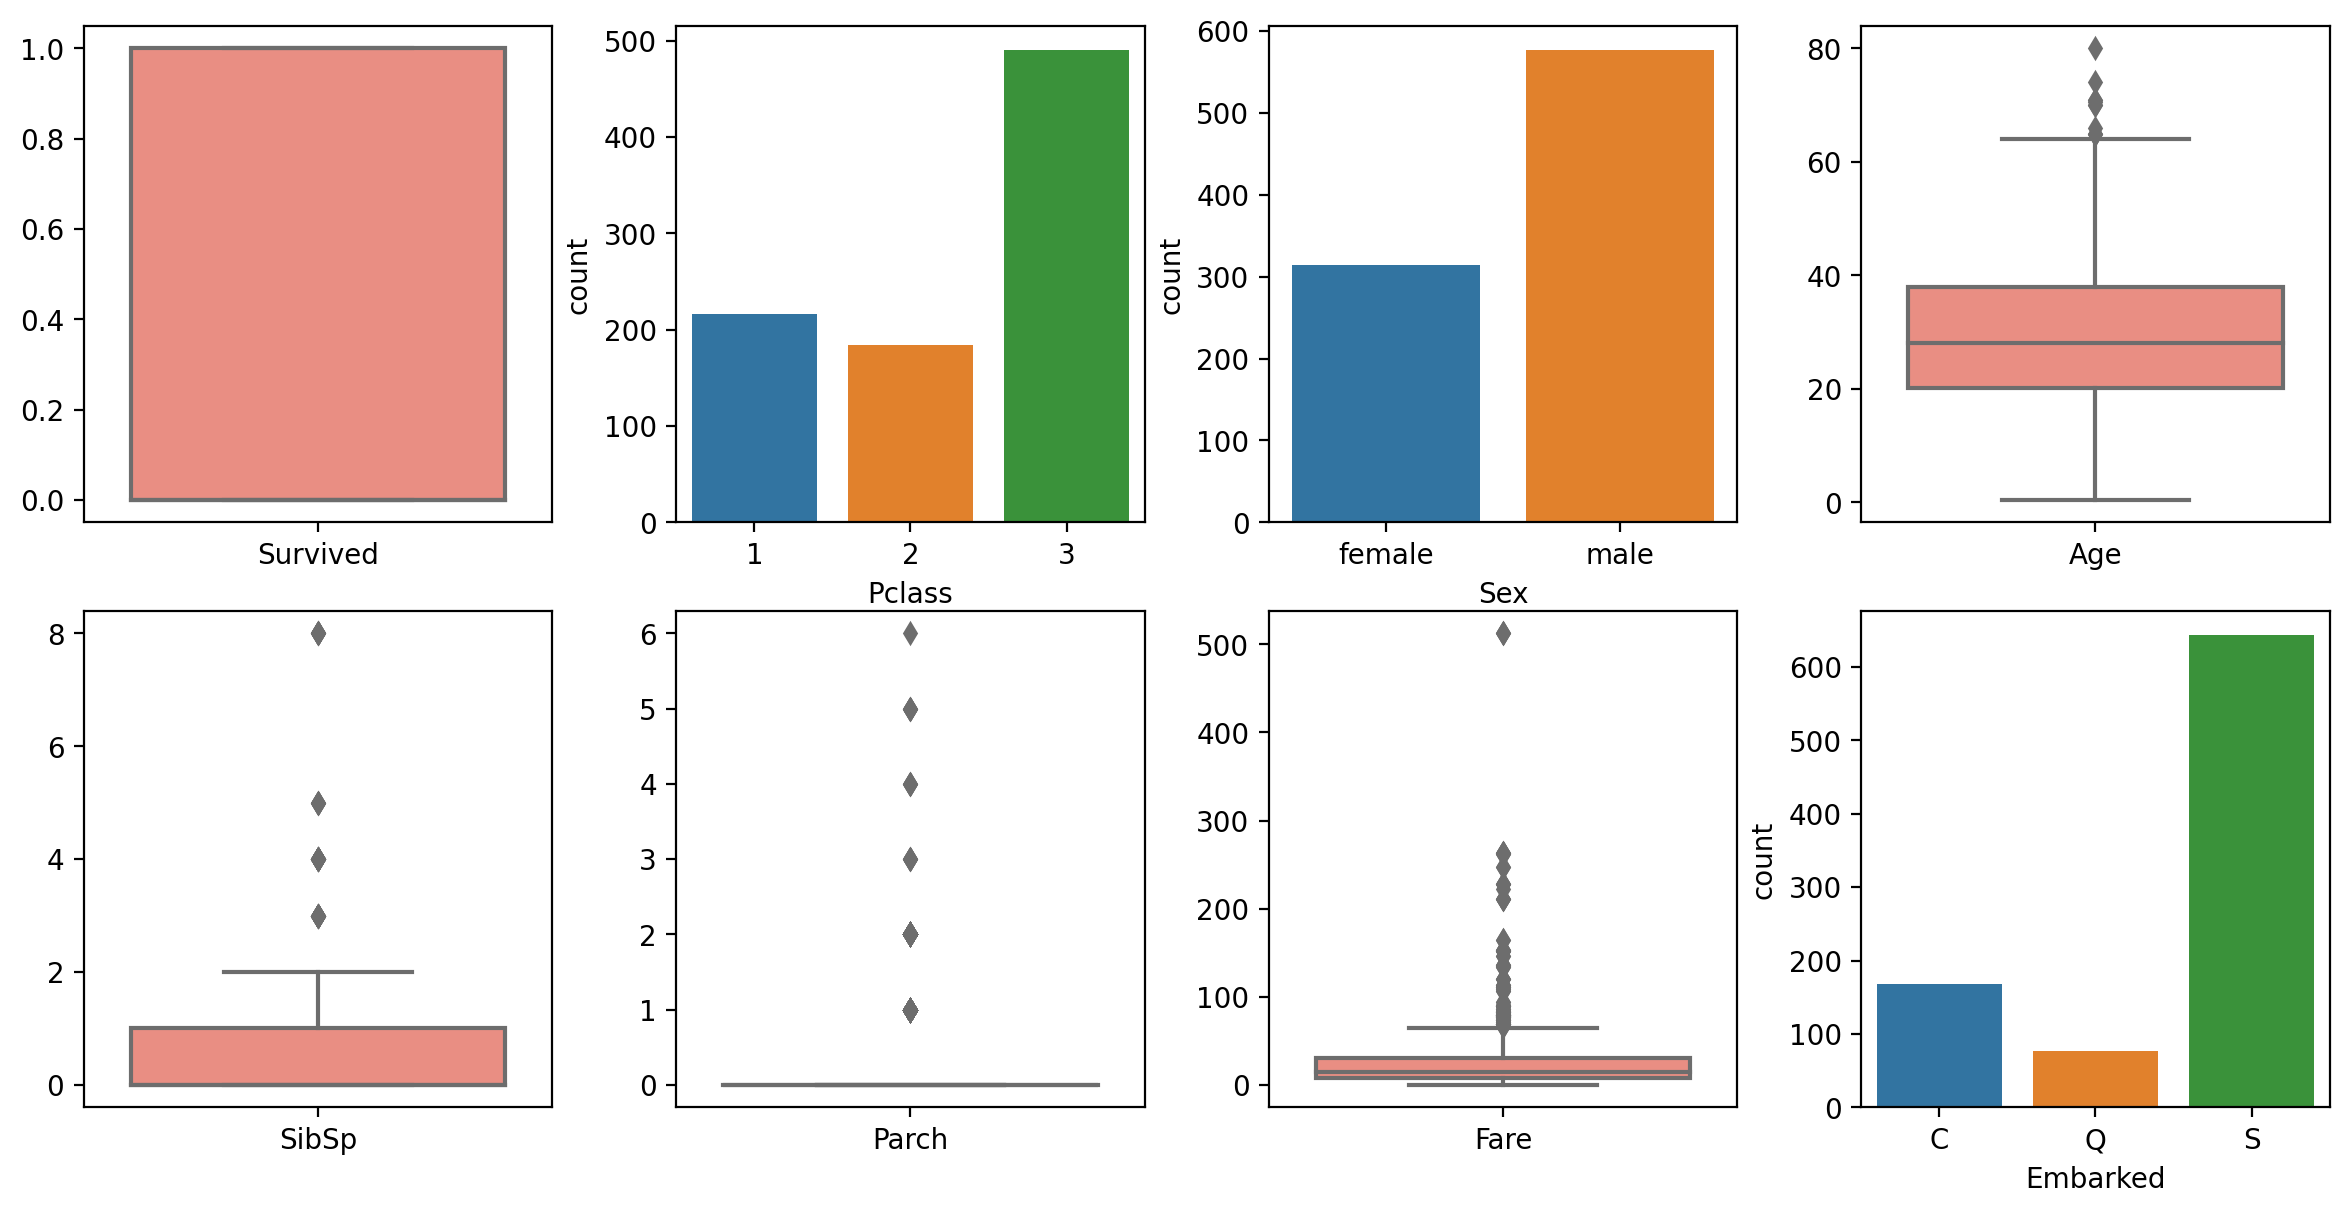

In [14]:
plot_mn(df, cols, 2, 'boxplot')

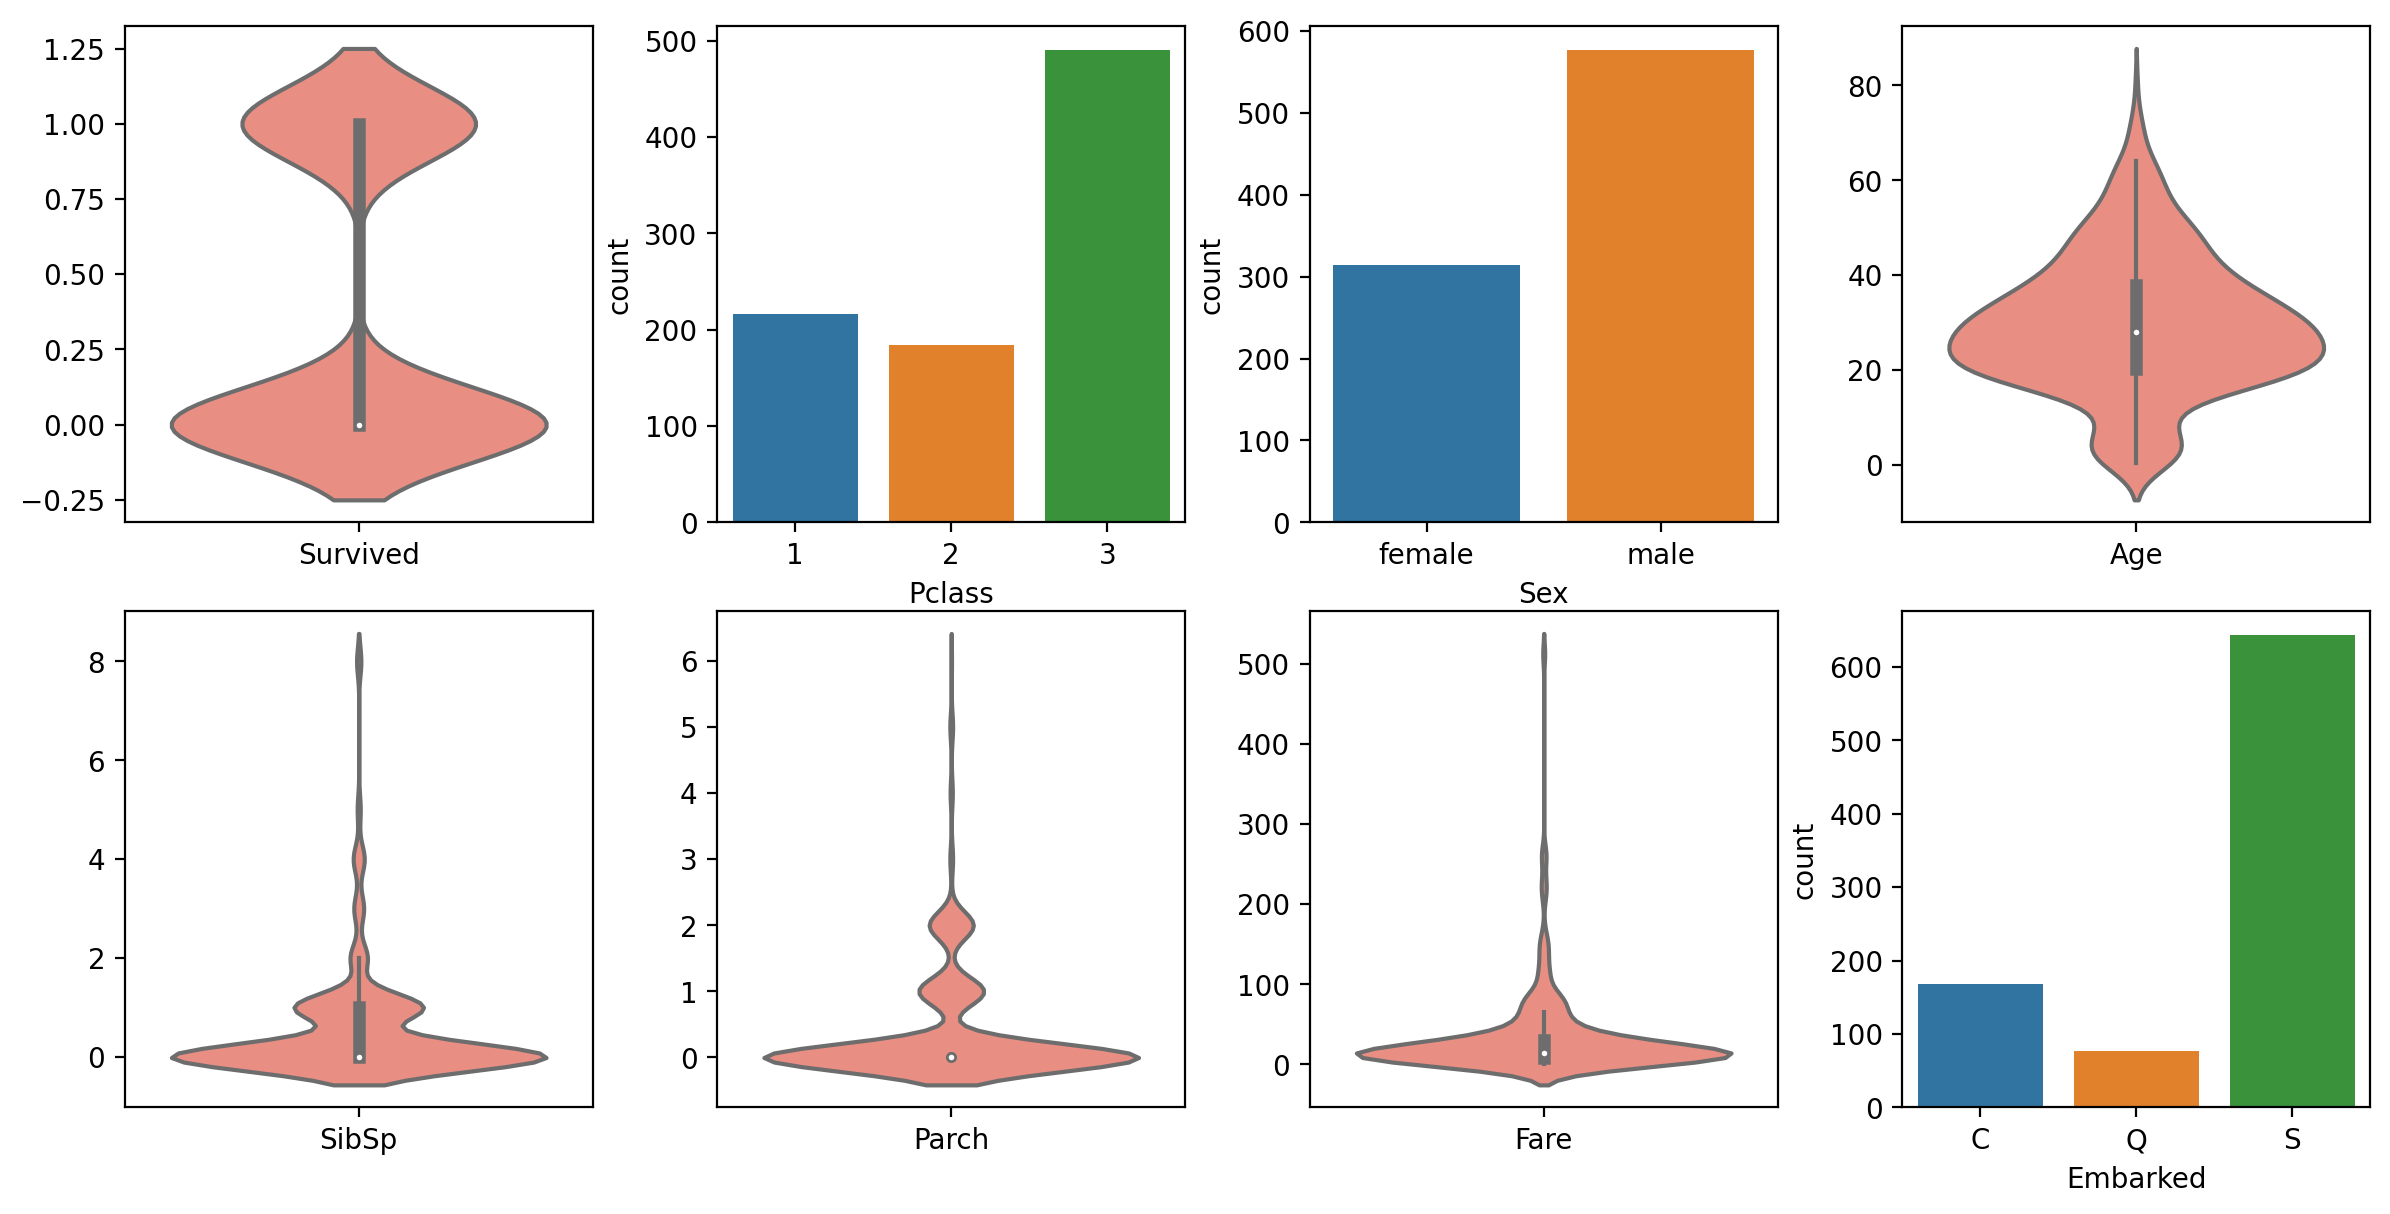

In [15]:
plot_mn(df, cols, 2, 'violin')

### LightGBM

- lightGBM
- LGBMClassifier